# Q3 Part A

In [1]:
# Step 1: import data and packages
import pandas as pd
import numpy as np
sales = pd.read_csv('Rogue-242-Fall2021.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MonthNumeric  162 non-null    int64  
 1   MonthFactor   162 non-null    object 
 2   Year          162 non-null    int64  
 3   RogueSales    162 non-null    int64  
 4   Unemployment  162 non-null    float64
 5   RogueQueries  162 non-null    int64  
 6   CPIAll        162 non-null    float64
 7   CPIEnergy     162 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.2+ KB


In [2]:
# Perform exploratory analysis
sales.head()

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
0,1,January,2008,5435,5.0,18,212.174,226.775
1,2,February,2008,5223,4.9,11,212.687,229.731
2,3,March,2008,6873,5.1,18,213.448,233.349
3,4,April,2008,5814,5.0,17,213.942,234.778
4,5,May,2008,7467,5.4,17,215.208,243.924


In [3]:
# plot scatter matrix
sales.corr()

,MonthNumeric,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
MonthNumeric,1.000000,-0.055626,0.010250,0.005178,-0.027966,0.018573,0.023861
Year,-0.055626,1.000000,0.806593,-0.519502,0.955366,0.985993,-0.288663
RogueSales,0.010250,0.806593,1.000000,-0.708006,0.834824,0.776689,-0.281817
Unemployment,0.005178,-0.519502,-0.708006,1.000000,-0.606273,-0.520535,0.063876
RogueQueries,-0.027966,0.955366,0.834824,-0.606273,1.000000,0.951788,-0.284251
CPIAll,0.018573,0.985993,0.776689,-0.520535,0.951788,1.000000,-0.166129
CPIEnergy,0.023861,-0.288663,-0.281817,0.063876,-0.284251,-0.166129,1.000000


RangeIndex(start=0, stop=162, step=1)


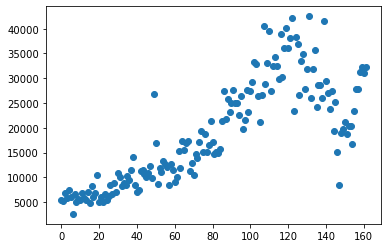

In [4]:
print(sales.index)
Index = sales.index
SalesUnits = sales.RogueSales
SalesLog = np.log(SalesUnits)

from matplotlib import pyplot as plt
plt.scatter(Index, SalesUnits)
plt.show()

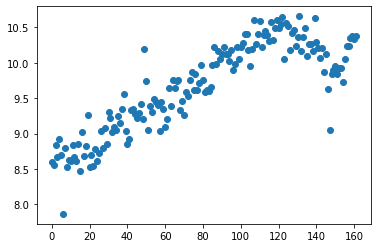

In [5]:
#Take the log of y and see if magic happens.
plt.scatter(Index, SalesLog)
plt.show()

In [6]:
# Data Splitting
# The training set should contain all observations from 2008 through 2015.
sales_train = sales[(2008 <= sales['Year']) & (sales['Year'] <= 2015)]
sales_train
# Testing set A should have all observations from January 2016 through December 2019
sales_testA = sales[(2016 <= sales['Year']) & (sales['Year'] <= 2019)]
sales_testA
# Testing set B should have all observations from January 2020 through July 2021.
MonthDiscard = ['August', 'September', 'October', 'November', 'December']
sales_2020 = sales[(sales['Year'] == 2020)]
sales_2021 = sales[(sales.Year == 2021) & (~sales.MonthFactor.isin(MonthDiscard))]
sales_testB = pd.concat([sales_2020, sales_2021])
sales_testB

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
144,1,January,2020,19396,3.5,78,258.687,219.117
145,2,February,2020,25111,3.5,80,258.824,213.963
146,3,March,2020,15210,4.4,58,257.989,202.995
147,4,April,2020,8505,14.8,45,256.192,183.788
148,5,May,2020,18900,13.3,67,255.942,179.610
149,6,June,2020,19845,11.1,84,257.282,187.591
150,7,July,2020,21192,10.2,88,258.604,191.566
151,8,August,2020,18837,8.4,82,259.511,193.362
152,9,Septeber,2020,20407,7.8,74,260.149,195.995
153,10,October,2020,20421,6.9,82,260.462,197.157


In [7]:
# Training the first linear regression model with all four features
import statsmodels.formula.api as smf
firstModel = smf.ols(formula = 'RogueSales ~ Unemployment + RogueQueries + CPIAll + CPIEnergy', data = sales_train)
firstResult = firstModel.fit()
print(firstResult.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     88.71
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.47e-30
Time:                        19:31:44   Log-Likelihood:                -898.41
No. Observations:                  96   AIC:                             1807.
Df Residuals:                      91   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.918e+04   1.42e+04     -4.884   

In [8]:
#P value of unemployment is larger than 0.05, suggesting that we can't reject the null hypothesis
#that the unemployment is insignificant. Therefore, unemployment is an insignificant variable that should be moved away.
secondModel = smf.ols(formula = 'RogueSales~RogueQueries + CPIAll + CPIEnergy', data = sales_train)
secondResult = secondModel.fit()
print(secondResult.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.45e-31
Time:                        19:31:44   Log-Likelihood:                -898.57
No. Observations:                  96   AIC:                             1805.
Df Residuals:                      92   BIC:                             1815.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.908e+04   1.41e+04     -4.895   

In [9]:
# Improving model by checking multicollenearity.
# Compute VIF of all three variables.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index = columns)

cols = ['RogueQueries', 'CPIAll', 'CPIEnergy']
VIF(sales_train, cols)


RogueQueries    4.477880
CPIAll          5.098905
CPIEnergy       1.471781
dtype: float64

In [10]:
# Both RogueQueries and CPIEnergy's VIF are very high.
# Let's try removing CPIAll first and build the model usign RogueQueries and CPIEnergy.
import statsmodels.formula.api as smf
thirdModel = smf.ols(formula = 'RogueSales ~ RogueQueries + CPIEnergy', data = sales_train)
thirdResult = thirdModel.fit()
print(thirdResult.summary())


                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.12e-27
Time:                        19:31:44   Log-Likelihood:                -911.69
No. Observations:                  96   AIC:                             1829.
Df Residuals:                      93   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5168.8436   3301.430      1.566   

In [11]:
# The P value of CPIEnergy in the model above is larger than 0.05, so this model is not good enough.
# Let's try removing RogueQueries instead and fit a new model.
import statsmodels.formula.api as smf
fourthModel = smf.ols(formula = 'RogueSales ~ CPIAll + CPIEnergy', data = sales_train)
fourthResult = fourthModel.fit()
print(fourthResult.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           9.64e-30
Time:                        19:31:44   Log-Likelihood:                -905.72
No. Observations:                  96   AIC:                             1817.
Df Residuals:                      93   BIC:                             1825.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.15e+05   8029.677    -14.325      0.0

In [12]:
#The R squared is quite high and the P value of both CPIAll and CPIEnergy are very small.
#Now let's check the VIF of these two variables.
cols = ['CPIAll', 'CPIEnergy']
VIF(sales_train, cols)

CPIAll       1.143011
CPIEnergy    1.143011
dtype: float64

In [13]:
# The VIF of these variables are also very small. 
# So the best model should be using CPIAll and CPIEnergy to estimate the sales number of Rogue Cars.

# Q3 Part B

##  Adding monthfactor as a categorical variable

In [14]:
# Train model on training set data with 5 variables including Monthfactor as the categorical variable. 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
modOld = smf.ols(formula = 'RogueSales ~ Unemployment + RogueQueries + CPIAll + CPIEnergy', data = sales_train).fit()
print(modOld.summary())
modDummy = smf.ols(formula = 'RogueSales ~ MonthFactor + Unemployment + RogueQueries + CPIAll + CPIEnergy',
                  data = sales_train).fit()
print(modDummy.summary())


                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     88.71
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.47e-30
Time:                        19:31:44   Log-Likelihood:                -898.41
No. Observations:                  96   AIC:                             1807.
Df Residuals:                      91   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.918e+04   1.42e+04     -4.884   

**We can see that only August, February, March and May and CPIAll and CPIEnergy are significantly important right now. However, we can't tell whether April is significant or not since it's hidden in the Intercept. So next we need to use April, August, February, March, May, CPIAll and CPIEnergy to construct a new model and see if April is significant.**

# Q3 part C
## Building the best model so far and use the model on testing set A and B

In [15]:
sales_Dummies = pd.get_dummies(sales_train, columns = ['MonthFactor'] )
print(sales_Dummies.columns)

Index(['MonthNumeric', 'Year', 'RogueSales', 'Unemployment', 'RogueQueries',
       'CPIAll', 'CPIEnergy', 'MonthFactor_April', 'MonthFactor_August',
       'MonthFactor_Decemeber', 'MonthFactor_February', 'MonthFactor_January',
       'MonthFactor_July', 'MonthFactor_June', 'MonthFactor_March',
       'MonthFactor_May', 'MonthFactor_November', 'MonthFactor_October',
       'MonthFactor_Septeber'],
      dtype='object')


In [16]:
# First try builidng new models with the factor April
modTry = smf.ols(formula = 'RogueSales ~ MonthFactor_August + MonthFactor_April + MonthFactor_February + MonthFactor_March + MonthFactor_May + CPIAll + CPIEnergy', data = sales_Dummies).fit()
print(modTry.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     57.18
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           4.74e-30
Time:                        19:31:44   Log-Likelihood:                -892.44
No. Observations:                  96   AIC:                             1801.
Df Residuals:                      88   BIC:                             1821.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.175e+05 

**We can see that April is not significant and therefore we should not include it in the model.**

In [17]:
#Build model without April.
modBest = smf.ols(formula = 'RogueSales ~ MonthFactor_August + MonthFactor_February + MonthFactor_March + MonthFactor_May + CPIAll + CPIEnergy', data = sales_Dummies).fit()
print(modBest.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     67.32
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.94e-31
Time:                        19:31:44   Log-Likelihood:                -892.52
No. Observations:                  96   AIC:                             1799.
Df Residuals:                      89   BIC:                             1817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.176e+05 

In [18]:
colsNew = ['MonthFactor_August', 'MonthFactor_February', 'MonthFactor_March', 'MonthFactor_May', 'CPIAll', 'CPIEnergy']

print(VIF(sales_Dummies, colsNew))

MonthFactor_August      1.035852
MonthFactor_February    1.034702
MonthFactor_March       1.033527
MonthFactor_May         1.032130
CPIAll                  1.149146
CPIEnergy               1.147671
dtype: float64


In [19]:
#Computing OSR squared on testA and testB
def OSR(model, testset, trainset, dependent_var):
    
    testY = testset[dependent_var]
    SSE = np.sum((testY - model.predict(testset))**2)
    SST = np.sum((testY - np.mean(trainset[dependent_var]))**2)
    
    return 1-SSE/SST

testA_Dummies = pd.get_dummies(sales_testA, columns = ['MonthFactor'])
testB_Dummies = pd.get_dummies(sales_testB, columns = ['MonthFactor'])
print(OSR(modBest,testA_Dummies, sales_Dummies, 'RogueSales'))
print(OSR(modBest,testB_Dummies, sales_Dummies, 'RogueSales'))

0.888137836216724
-0.6644988643010032


# Q3 Partd
## Adding new feature

In [20]:
# Adding new feature: Annual Vehicle Distance to the training data and testing data
AnnualDist = pd.read_csv('Annual Vehicle-Distance.csv')
frames = [sales, AnnualDist]
newData = pd.concat(frames, axis = 1)
#print(newData.head())
#print(newData.tail())
newDummies = pd.get_dummies(newData, columns = ['MonthFactor'])
newDummies.rename(columns = {'Annual Vehicle-Distance Traveled (Billion Miles)':'AnnualDist'}, inplace = True)
#print(newDummies.tail(10))
newDummies_train = newDummies[(2008 <= newDummies['Year']) & (newDummies['Year'] <= 2015)]
newDummies_testA = newDummies[(2016 <= newDummies['Year']) & (newDummies['Year'] <= 2019)]
newDummies_testB = newDummies[(newDummies['Year'] == 2020) | (newDummies['Year'] == 2021)]

In [21]:
#train model on new trainingset
newBestMod = smf.ols(formula = 'RogueSales ~ MonthFactor_August + MonthFactor_February + MonthFactor_March + MonthFactor_May + CPIAll + CPIEnergy + AnnualDist', data = newDummies_train).fit()
print(newBestMod.summary())
colsVIF = ['MonthFactor_August' , 'MonthFactor_February', 'MonthFactor_March', 'MonthFactor_May' , 'CPIAll' , 'CPIEnergy' , 'AnnualDist']
print(VIF(newDummies_train, colsVIF))
print(OSR(newBestMod, newDummies_testA, newDummies_train, 'RogueSales'))
print(OSR(newBestMod, newDummies_testB, newDummies_train, 'RogueSales'))
#The training R squared improves a lot.
#The OSR squared doesn't improve which suggest the new feature is not adding predictive value.

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     69.73
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.53e-33
Time:                        19:31:44   Log-Likelihood:                -884.49
No. Observations:                  96   AIC:                             1785.
Df Residuals:                      88   BIC:                             1806.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.118e+05 